## Import required libraries

In [149]:
#!pip install plotly
# !pip install seaborn

In [150]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
# import seaborn as sns

import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

%matplotlib notebook

In [151]:
# !pip install --upgrade plotly

In [152]:
plotly.__version__

'4.5.0'

In [205]:
init_notebook_mode(connected=True)

# plotly 
- Modern Visualization for the data Era

## Intro charts

### Line Chart in plotly

- 2 numeric variables with 1-1 mapping, i.e in situations where we have 1 y value corresponding to 1 x value

In [154]:
x=[1, 2, 3]
y=[3, 1, 6]

iplot([go.Scatter(x=x, y=y)])

> You can export images to html file only with offline mode

https://plot.ly/python/static-image-export/

https://plot.ly/python/privacy/

In [155]:
from plotly.offline import plot

plot([go.Scatter(x=x, y=y)],
     output_type='file' ,filename='temp-histogram', image='jpeg', auto_open=False)

C:\Users\chait\Anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `temp-histogram` didn't end with .html. Adding .html to the end of your file.



'temp-histogram.html'

Note that this is a bare chart with no information, Later in the activity we will add title, x labels and y labels.

### Basic Bar chart in plotly

- 1 Categorical variable

In [156]:
data = [go.Bar(
            x=['x', 'y', 'z'],
            y=[10, 20, 15])]
iplot(data)

#iplot([go.Bar(x=['x', 'y', 'z'], y=[10, 20, 15])])

### Histogram in plotly

- 1 numeric variable

In [157]:
n = 100000
x = np.random.randn(n)

data = [go.Histogram(x=x,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
        #color = 'rgb(255,69,0)')   # you can provide color in HEX format or rgb format, genrally programmers prefer HEX format as it is a single string value and easy to pass as a variable
    ))]

layout = go.Layout(title = "Histogram of {} random numbers".format(n))

fig = go.Figure(data= data, layout=layout)

iplot(fig)

You can find some interesting color codes here

https://www.rapidtables.com/web/color/html-color-codes.html

### Boxplot in plotly

- 1 Numeric variable

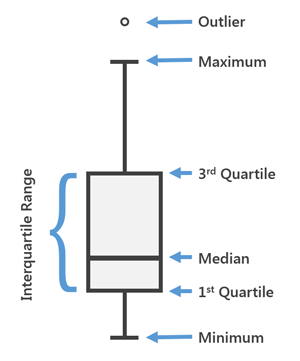

In [158]:
from IPython.display import Image
Image("img/boxplot.png")

In [159]:
np.random.seed(0) # Set seed for reproducibility
n = 5000
r1 = np.random.randn(n)
r2 = np.random.randn(n)

trace0 = go.Box(
    y=r1,
    name = 'Box1',
    marker = dict(
        color = '#AA0505',
    )
)
trace1 = go.Box(
    y=r2,
    name = 'Box2',
    marker = dict(
        color = '#B97D10',
    )
)
data = [trace0, trace1]
layout = go.Layout(title = "Boxplot of 2 sets of random numbers")
fig = go.Figure(data= data, layout=layout)
iplot(fig)

###  Subplots in a single plot

In [160]:
from plotly import tools

trace1 = go.Scatter(x=[1, 2, 3], y=[4, 5, 6])
trace2 = go.Scatter(x=[20, 30, 40], y=[50, 60, 70])
trace3 = go.Scatter(x=[300, 400, 500], y=[600, 700, 800])
trace4 = go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000])

## make a grid to plot 
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Plot 1', 'Plot 2',
                                                          'Plot 3', 'Plot 4'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=600, title='Subplots' +
                                                  ' with Titles')

iplot(fig)

C:\Users\chait\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Pie chart in plotly

- 1 Categorical variable

In [161]:
labels = ["Pre processing and Visualization","Collecting Data","Model Building","Refining Algorithms","Others"]
values = [60,15,15,5,5]
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#000000']


trace = go.Pie(labels=labels, values=values,
               marker=dict(colors=colors, line=dict(color='#000000', width=2)))

layout = go.Layout(title = 'Percentage of time spent on Data Science projects')
data = [trace]
fig = go.Figure(data= data,layout=layout)
iplot(fig)

> Note: We do not suggest you use pie chart, one reason being the total is not always obvious and second, having many levels will make the chart cluttered.

### Scatter plot in plotly

- 2 numeric variables
- One x might have multiple corresponding y values

In [162]:
np.random.seed(0) 
n = 20
x=np.random.randint(0,100,n)
y=np.random.randint(0,100,n)

data = [go.Scatter(x=x,
                   y=y,
                   
                   marker = dict(color = 'rgba(17, 157, 255, 0.6)', size = 10),
                   
                   mode = 'markers')]

layout = go.Layout(title = 'Scatter plot')
fig = go.Figure(data= data,layout=layout)
iplot(fig)

### Heatmap

No of people going to a movie theatre on a particular week

In [163]:
trace = go.Heatmap(z=[[10, 10, 20, 30, 50, 100, 150], [10, 20, 30, 40, 80, 120, 180], [20, 30, 40, 80, 100, 170, 200]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                   y=['Morning', 'Afternoon', 'Evening'],
                  colorscale='Jet')

data=[trace]
iplot(data)


### Cloropleth Map

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df.head()

code       state category  total exports   beef  pork  poultry   dairy  \
0   AL     Alabama    state        1390.63   34.4  10.6    481.0    4.06   
1   AK      Alaska    state          13.31    0.2   0.1      0.0    0.19   
2   AZ     Arizona    state        1463.17   71.3  17.9      0.0  105.48   
3   AR    Arkansas    state        3586.02   53.2  29.4    562.9    3.53   
4   CA  California    state       16472.88  228.7  11.1    225.4  929.95   

   fruits fresh  fruits proc  total fruits  veggies fresh  veggies proc  \
0           8.0         17.1         25.11            5.5           8.9   
1           0.0          0.0          0.00            0.6           1.0   
2          19.3         41.0         60.27          147.5         239.4   
3           2.2          4.7          6.88            4.4           7.1   
4        2791.8       5944.6       8736.40          803.2        1303.5   

   total veggies  corn  wheat   cotton  
0          14.33  34.9   70.0   317.61  
1           1.56   0.0    0.0     0.00  
2         386.91   7.3   48.7   423.95  
3          11.45  69.5  114.5   665.44  
4        2106.79  34.6  249.3  1064.95

In [165]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']
df.head()

code       state category total exports   beef  pork poultry   dairy  \
0   AL     Alabama    state       1390.63   34.4  10.6   481.0    4.06   
1   AK      Alaska    state         13.31    0.2   0.1     0.0    0.19   
2   AZ     Arizona    state       1463.17   71.3  17.9     0.0  105.48   
3   AR    Arkansas    state       3586.02   53.2  29.4   562.9    3.53   
4   CA  California    state      16472.88  228.7  11.1   225.4  929.95   

  fruits fresh fruits proc total fruits veggies fresh veggies proc  \
0          8.0        17.1        25.11           5.5          8.9   
1          0.0         0.0          0.0           0.6          1.0   
2         19.3        41.0        60.27         147.5        239.4   
3          2.2         4.7         6.88           4.4          7.1   
4       2791.8      5944.6       8736.4         803.2       1303.5   

  total veggies  corn  wheat   cotton  \
0         14.33  34.9   70.0   317.61   
1          1.56   0.0    0.0      0.0   
2        386.91   7.3   48.7   423.95   
3         11.45  69.5  114.5   665.44   
4       2106.79  34.6  249.3  1064.95   

                                                text  
0  Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...  
1  Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...  
2  Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...  
3  Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...  
4  California<br>Beef 228.7 Dairy 929.95<br>Fruit...

In [166]:
## color scale
scl = [[0.0, 'rgb(255,255,255)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(type='choropleth', colorscale = scl, autocolorscale = False,
        locations = df['code'], z = df['total exports'].astype(float), locationmode = 'USA-states',
        text = df['text'],
        
        marker = dict(line = dict( color = 'rgb(255,255,255)', width = 2)),
        colorbar = dict( title = "Millions USD")) ]

layout = dict(title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
              geo = dict( scope='usa', projection=dict( type='albers usa' ),
                         showlakes = True, lakecolor = 'rgb(255, 255, 255)'))
    
fig = dict( data=data, layout=layout )
iplot(fig)

### World Map

In [167]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.head()

COUNTRY  GDP (BILLIONS) CODE
0     Afghanistan           21.71  AFG
1         Albania           13.40  ALB
2         Algeria          227.80  DZA
3  American Samoa            0.75  ASM
4         Andorra            4.80  AND

In [168]:
data = [ dict( type = 'choropleth', locations = df['CODE'], z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        autocolorscale = True,
        marker = dict(line = dict (color = 'rgb(0,0,0)', width = 0.5)),
              
        colorbar = dict( autotick = False, tickprefix = '$', title = 'GDP<br>Billions US$')) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv">\
            2014 GDP Data</a>',
    
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

## Case Study

Now let us use our new found skill to extract insights from a dataset

### hr_data Description

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [169]:
hr_data = pd.read_csv("HR_Attrition_data.csv")

### Pre-processing

In [170]:
hr_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

       Education EducationField  EmployeeNumber EnvironmentSatisfaction  \
0        College  Life Sciences               1                  Medium   
1  Below College  Life Sciences               2                    High   
2        College          Other               4               Very High   
3         Master  Life Sciences               5               Very High   
4  Below College        Medical               7                     Low   

   Gender  ... RelationshipSatisfaction  StandardHours StockOptionLevel  \
0  Female  ...                      Low             80                0   
1    Male  ...                Very High             80                1   
2    Male  ...                   Medium             80                0   
3  Female  ...                     High             80                0   
4    Male  ...                Very High             80                1   

  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 8                     0              Bad               6   
1                10                     3           Better              10   
2                 7                     3           Better               0   
3                 8                     3           Better               8   
4                 6                     3           Better               2   

  YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                       0                     5  
1                  7                       1                     7  
2                  0                       0                     0  
3                  7                       3                     0  
4                  2                       2                     2  

[5 rows x 31 columns]

#### Checking the datatypes

In [171]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [172]:
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Checking the number of unique values in each column

In [173]:
for i in hr_data.columns:
    print ("Number of unique values in {} column are {} \n The unique values are {}".format(i, len(hr_data[i].unique()),hr_data[i].unique()))
    print ("---------------------- \n")

Number of unique values in Age column are 43 
 The unique values are [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
---------------------- 

Number of unique values in Attrition column are 2 
 The unique values are ['Yes' 'No']
---------------------- 

Number of unique values in BusinessTravel column are 3 
 The unique values are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------- 

Number of unique values in Department column are 3 
 The unique values are ['Sales' 'Research & Development' 'Human Resources']
---------------------- 

Number of unique values in DistanceFromHome column are 29 
 The unique values are [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
---------------------- 

Number of unique values in Education column are 5 
 The unique values are ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
---------------------- 

N

Observations:
    - Most columns have fewer than 4 unique levels
    - NumCompaniesWorked and PercentSalaryHike have less than 15 values and we can convert these in to categorical values for analysis purposes, this is fairly subjective. You can also continue with these as integer values.

#### Extract categorical columns

Columns with 15 or less levels are considered as categorical columns for the purpose of this analysis

We have decided to treat all the columns with 15 or less levels as categorical columns, the following few lines of code extract all the columns which satisy the condition.

In [174]:
cat_cols = []

for i in hr_data.columns:
    if hr_data[i].dtype =='object' or len(np.unique(hr_data[i]))<=15 : # if the number of levels is less that 15 considering the column as categorial
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(hr_data[i])),np.unique(hr_data[i])))

Attrition : 2 : ['No' 'Yes'] 
BusinessTravel : 3 : ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 
Department : 3 : ['Human Resources' 'Research & Development' 'Sales'] 
Education : 5 : ['Bachelor' 'Below College' 'College' 'Doctor' 'Master'] 
EducationField : 6 : ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 
EnvironmentSatisfaction : 4 : ['High' 'Low' 'Medium' 'Very High'] 
Gender : 2 : ['Female' 'Male'] 
JobInvolvement : 4 : ['High' 'Low' 'Medium' 'Very High'] 
JobLevel : 5 : [1 2 3 4 5] 
JobRole : 9 : ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative'] 
JobSatisfaction : 4 : ['High' 'Low' 'Medium' 'Very High'] 
MaritalStatus : 3 : ['Divorced' 'Married' 'Single'] 
NumCompaniesWorked : 10 : [0 1 2 3 4 5 6 7 8 9] 
Over18 : 1 : ['Y'] 
OverTime : 2 : ['No' 'Yes'] 
PercentSalaryHike : 15 : [11 12 13 14 15 16

#### Print the categorical column names 

In [175]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

#### Check if the above columns are categorical in the dataset

In [176]:
hr_data[cat_cols].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
dtype: object

#### Type Conversion

- n dimensional type convesrion to 'category' is not implemented yet

In [177]:
for i in cat_cols:
    hr_data[i] = hr_data[i].astype('category')

#### Extracting Numeric Columns

In [178]:
num_cols = [i for i in hr_data.columns if i not in cat_cols]

In [179]:
hr_data[num_cols].dtypes

Age                        int64
DistanceFromHome           int64
EmployeeNumber             int64
MonthlyIncome              int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

In [180]:
hr_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

       Education EducationField  EmployeeNumber EnvironmentSatisfaction  \
0        College  Life Sciences               1                  Medium   
1  Below College  Life Sciences               2                    High   
2        College          Other               4               Very High   
3         Master  Life Sciences               5               Very High   
4  Below College        Medical               7                     Low   

   Gender  ... RelationshipSatisfaction StandardHours StockOptionLevel  \
0  Female  ...                      Low            80                0   
1    Male  ...                Very High            80                1   
2    Male  ...                   Medium            80                0   
3  Female  ...                     High            80                0   
4    Male  ...                Very High            80                1   

  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                 8                     0              Bad              6   
1                10                     3           Better             10   
2                 7                     3           Better              0   
3                 8                     3           Better              8   
4                 6                     3           Better              2   

  YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager  
0                  4                       0                    5  
1                  7                       1                    7  
2                  0                       0                    0  
3                  7                       3                    0  
4                  2                       2                    2  

[5 rows x 31 columns]

## _Exploratory Data Analysis_

### Univariate Analysis

#### Attrition rate in percentage

In [182]:
temp = hr_data.Attrition.value_counts()

In [183]:
trace = go.Bar(x=temp.index,
               y= np.round(temp.astype(float)/temp.values.sum(),2),
               text = np.round(temp.astype(float)/temp.values.sum(),2),
               textposition = 'inside',
               name = 'Attrition')
data = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Attrition Distribution"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#del temp

#### What is the Gender Distribution in the company?

In [184]:
temp = hr_data.Gender.value_counts()
temp

Male      882
Female    588
Name: Gender, dtype: int64

In [185]:
data = [go.Bar(
            x=temp.index,
            y= np.round(temp.astype(float)/temp.values.sum(),2),
            text = np.round(temp.astype(float)/temp.values.sum(),2),
            textposition = 'auto',
    )]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Gender Distribution",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
del temp

In [186]:
temp = hr_data.Gender.value_counts()
temp

Male      882
Female    588
Name: Gender, dtype: int64

#### Steps to create a bar chart with counts for a categorical variable in plotly

- Steps to create a bar chart with counts for a categorical variable
    - create an object and store the counts (optional)
    - create  a bar object
        - pass the x values
        - pass the y values
        - optional :
            - text to be displayed
            - text position
            - color of the bar
            - name of the bar (trace in plotly terminology)
    - create a layout object
        - title - font and size of title
        - x axis - font and size of xaxis text
        - y axis - font and size of yaxis text
    - create a figure object:
        - add data
        - add layout
    - plot the figure object

In [187]:
# create a table with value counts
temp = hr_data.Gender.value_counts()
# creating a Bar chart object of plotly
data = [go.Bar(
        x=temp.index.astype(str), # x axis values
        y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
        text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
        textposition = 'inside', # specify at which position on the bar the text should appear
    marker = dict(color = '#000000'),)] # change color of the bar
# color used here Black

# these are used to define the layout options

layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=800, # height of the figure in pixels
    height=600, # height of the figure in pixels
    title = "Distribution of {} column".format('Gender'), # title of the figure
    
    # more granular control on the title font 
    titlefont=dict( 
        family='Courier New, monospace', # font family
        size=10, # size of the font
        color='green' # color of the font
    ),
    
    
    # granular control on the axes objects 
    xaxis=dict(title='Gender', titlefont=dict(size=15,color="magenta"),
        
               tickfont=dict(
                   family='Courier New, monospace', # font family
                   size=20, # size of ticks displayed on the x axis
                   color='red'  # color of the font
        )
    ),
    
    
    yaxis=dict(title='Percentage', titlefont=dict(size=30,color='orange'),
               
               tickfont=dict(
                   family='Courier New, monospace', # font family
                   size=40, # size of ticks displayed on the y axis
                   color='blue' # color of the font
        )
    ),
    
    
    font = dict(
        family='Courier New, monospace', # font family
        color = "#FF00FF",# color of the font
        size = 60 # size of the font displayed on the bar
        )  
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

del temp

####  We will save the above layout in an object and define a function for future use

In [188]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

#### Defining a function to plot the bar charts

In [189]:
def plot_bar(col_name):
    # create a table with value counts
    temp = hr_data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

#### How many people travel? (BusinessTravel)


In [190]:
plot_bar('BusinessTravel')

#### Which department has the highest number of employees? (Department)

In [191]:
plot_bar("Department")

#### Is the workforce in the company young? (Age)

In [192]:
plot_bar('Age')

- Age is a continuous variable, it makes more sense to plot a histogram rather than a bar chart

#### Age distribution in the company

In [193]:
data = [go.Histogram(x=hr_data.Age,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   `
    ))]
layout = go.Layout(title = "Histogram of Age".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

#### What is the income distribution in the company?(MonthlyIncome)

In [194]:
data = [go.Histogram(x=hr_data.MonthlyIncome,
       marker=dict(
        color='#CC0E1D',# Lava (#CC0E1D)
#         color = 'rgb(200,0,0)'   
    ))]
layout = go.Layout(title = "Histogram of Income".format(n))
fig = go.Figure(data= data, layout=layout)
iplot(fig)

Observations: 
    - We see that the income column has a long tailed distribution
    - Binning might give better insghts into the distribution

##### Let us bin the Income column

In [195]:
# np.digitize(hr_data.MonthlyIncome,list(range(0,hr_data.MonthlyIncome.max(),2500)),right=True)

In [196]:
max(hr_data['MonthlyIncome'])

19999

In [197]:
hr_data['Income_Bins'] = np.digitize(hr_data.MonthlyIncome,list(range(0,hr_data.MonthlyIncome.max()+10,2500)),right=True)

In [198]:
list(range(0,hr_data.MonthlyIncome.max()+10,2500))

[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]

In [199]:
hr_data['Income_Bins'].value_counts()

2    523
3    310
1    226
4    130
5     91
8     81
6     57
7     52
Name: Income_Bins, dtype: int64

In [200]:
hr_data['Income_Bins'] = hr_data['Income_Bins'].replace(to_replace=[1,2,3,4,5,6,7,8],
                                                        value=['Bin1','Bin2','Bin3',
                                                                               'Bin4','Bin5','Bin6','Bin7','Bin8'])

In [201]:
temp = hr_data['Income_Bins'].value_counts()
temp=temp.sort_index()

In [202]:
trace1 = go.Bar(x = temp.index,
               y = (temp.values.astype(float)/sum(temp.values))*100,
                text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),2)*100],
    # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
                textposition = 'auto',
               name = 'Income_Bins')
data = [trace1]
# these are used to define the layout options

layout = generate_layout_bar('Income_Bins')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Observe the last columns

### Bivariate analysis

#### Is a particular gender travelling more distance than other?(Gender and Distance from home)

In [203]:
trace1 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Male'],name = 'Male',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.DistanceFromHome[hr_data.Gender=='Female'],name= 'Female',
               boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 500,title = 'Distance from home and Gender')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

#### Are employees working overtime getting better ratings? (OverTime and Performance Rating.)


In [204]:
temp = hr_data.groupby(['OverTime','PerformanceRating']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['OverTime','PerformanceRating','Count']
temp

OverTime PerformanceRating  Count
0       No         Excellent    893
1       No       Outstanding    161
2      Yes         Excellent    351
3      Yes       Outstanding     65

In [109]:
hr_data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [110]:
trace1 = go.Bar(x = temp.OverTime[temp.PerformanceRating=='Excellent'],
               y = temp.Count[temp.PerformanceRating=='Excellent']/temp.Count.sum(),
               name = 'Excellent')
trace2 = go.Bar(x = temp.OverTime[temp.PerformanceRating=='Outstanding'],
               y = temp.Count[temp.PerformanceRating=='Outstanding']/temp.Count.sum(),
               name = 'Outstanding')
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 600,title = 'OverTime and PerformanceRating')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

All the percentages add up to one, so we can compare the numbers globally

#### Employees who spend more years in the company tend to leave. Verify if this is true.(Years at company and Attrition)

In [111]:
hr_data.YearsAtCompany[hr_data.Attrition=='Yes'].describe()


count    237.000000
mean       5.130802
std        5.949984
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       40.000000
Name: YearsAtCompany, dtype: float64

In [112]:
hr_data.YearsAtCompany[hr_data.Attrition=='No'].describe()

count    1233.000000
mean        7.369019
std         6.096298
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        37.000000
Name: YearsAtCompany, dtype: float64

In [113]:
trace1 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='Yes'],name = 'Yes',
#                 boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = hr_data.YearsAtCompany[hr_data.Attrition=='No'],name= 'No',
#                boxpoints = 'all',jitter = 1
               )
data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'YearsAtCompany and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

#### Is a particular age group more prone to leaving the company? (Age and Attrition)

Trying to answer the question by looking at the raw data

In [114]:
hr_data.Age[hr_data.Attrition=='Yes'].describe()

count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

In [115]:
hr_data.Age[hr_data.Attrition=='No'].describe()

count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [116]:
trace1 = go.Box(y = hr_data.Age[hr_data.Attrition=='Yes'],name = 'Yes')
trace2 = go.Box(y = hr_data.Age[hr_data.Attrition=='No'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Age and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

You can also bin the age column and do the same

#### Employees earning less tend to leave the company. Verify if this is true. (Monthly Income vs Attrition)


In [117]:
hr_data.MonthlyIncome[hr_data.Attrition=='Yes'].describe()

count      237.000000
mean      4787.092827
std       3640.210367
min       1009.000000
25%       2373.000000
50%       3202.000000
75%       5916.000000
max      19859.000000
Name: MonthlyIncome, dtype: float64

In [118]:
hr_data.MonthlyIncome[hr_data.Attrition=='No'].describe()

count     1233.000000
mean      6832.739659
std       4818.208001
min       1051.000000
25%       3211.000000
50%       5204.000000
75%       8834.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [119]:
trace1 = go.Box(y = hr_data.MonthlyIncome[hr_data.Attrition=='Yes'],name = 'Yes')
trace2 = go.Box(y = hr_data.MonthlyIncome[hr_data.Attrition=='No'],name= 'No')

data = [trace1,trace2]
layout = go.Layout(width = 800,
                   height = 500,title = 'Income and Attrition')
fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [120]:
num_cols

['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### How do Age and Monthly Income vary?

In [121]:
hr_data[['Age','MonthlyIncome']].corr()

Age  MonthlyIncome
Age            1.000000       0.497855
MonthlyIncome  0.497855       1.000000

In [122]:
trace = go.Scatter(x=hr_data.Age ,
                  y= hr_data.MonthlyIncome,
                  name = 'Age and MonthlyIncome',
                  mode= 'markers')
data = [trace]
layout = go.Layout(title = ' Age and Monthly Income distribution',
                  xaxis = dict(title = 'Age'),
                  yaxis = dict(title = 'Monthly Income'))
fig = go.Figure(data=data,layout=layout)
iplot(fig)


### 3 variables

#### Two Numeric Columns with Category as colour

In [123]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_matrix(iris,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

####  3D plot with 3 Numeric variables and fourth variable as colour
Generate a new feature  using TotalWorkingYears and Number of companies worked

In [124]:
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

## Animated figures with Plotly Express (Population of countries)

In [125]:
gapminder = px.data.gapminder()

In [126]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [127]:
gapminder.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [128]:
gapminder_americas = gapminder[gapminder['continent'] == 'Americas']

In [129]:
gapminder_americas.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
48  Argentina  Americas  1952   62.485  17876956  5911.315053       ARG   
49  Argentina  Americas  1957   64.399  19610538  6856.856212       ARG   
50  Argentina  Americas  1962   65.142  21283783  7133.166023       ARG   
51  Argentina  Americas  1967   65.634  22934225  8052.953021       ARG   
52  Argentina  Americas  1972   67.065  24779799  9443.038526       ARG   

    iso_num  
48       32  
49       32  
50       32  
51       32  
52       32

In [130]:
px.scatter(gapminder_americas, x="pop", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="country", hover_name="country",log_x=True, size_max=55, range_y=[25,90])